In [36]:
import pandas as pd
import numpy as np
import os
os.chdir('/home/jovyan/work/src')
import sys
import init
import do_aperture
import read_photometry
import reading
import logging
import glob

import importlib
importlib.reload(do_aperture)
importlib.reload(read_photometry)

%matplotlib inline
import matplotlib as plt
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%reload_ext autoreload
%autoreload 2
os.chdir('/home/jovyan/work')
logging.getLogger().setLevel(logging.INFO)
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s")


Reading data of photometry files

In [2]:
_, _, apertureidx, _ = reading.aperture_and_compstars()
print("apertureidx: ", apertureidx)
# reading photometry files
jdphot, fwhmphot, nrstarsphot, star_resultphot = read_photometry.read_photometry(init.star_list, apertureidx, matched_files=glob.glob(init.photometrydir+'*.pht'))
print(f"Percent of stars detected: {np.sum(nrstarsphot)/(len(init.star_list)*len(nrstarsphot))*100}")

  0%|          | 0/900 [00:00<?, ?it/s]

apertureidx:  2


100%|██████████| 900/900 [00:18<00:00, 49.33it/s]

Percent of stars detected: 83.52264444444445


Reading data of matching files

In [4]:
jd, fwhm, nrstars, star_result = read_photometry.read_photometry(init.star_list, apertureidx)
print(f"Percent of stars detected: {np.sum(nrstars)/(len(init.star_list)*len(nrstars))*100}")

100%|██████████| 900/900 [00:20<00:00, 44.56it/s]

Percent of stars detected: 83.52264444444445


0.593664555556
(900, 10000, 2)
sum finite flat = len flat 0.593664555556
9000000
0.296832277778


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15013897b8>]], dtype=object)

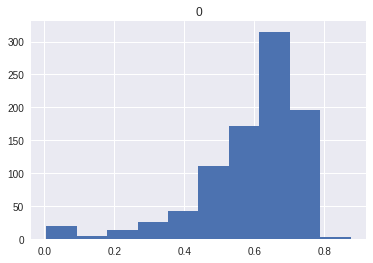

In [5]:
totalcount = 0
for fileentry in star_result:
    totalcount += np.sum(np.isfinite(fileentry))/2
print(totalcount/(len(init.star_list)*len(star_result)))
print(star_result.shape)
flat=star_result.flatten()
semiflat = np.reshape(star_result,(-1, 2))

print("sum finite flat = len flat", np.sum(np.isfinite(flat))/len(flat))
#df = pd.DataFrame()

print(semiflat.shape[0])
print(np.sum(np.isfinite(flat))/(len(flat)*2))
results = [] 
for file_entry in star_result:
    results.append(np.sum(np.isfinite(file_entry.flatten()))/(len(file_entry.flatten())))
df = pd.DataFrame(results)
df.hist()
# print(sorted(results))

In [ ]:
do_muniwin.write_photometry(use_config=True, custom_config=None, custom_wildcard=None, custom_outputfile=None,
                     custom_outputdir=None):


In [ ]:
import csv
import operator

def write_properties(filename,dictionary):
    """ Writes the provided dictionary in key-sorted order to a properties file with each line of the format key=value

    Keyword arguments:
        filename -- the name of the file to be written
        dictionary -- a dictionary containing the key/value pairs.
    """
    with open(filename, "wb") as csvfile:
        writer = csv.writer(csvfile, delimiter='=', escapechar='\\', quoting=csv.QUOTE_NONE)
        for key, value in sorted(dictionary.items(), key=operator.itemgetter(0)):
                writer.writerow([ key, value])

def main():
    data={
        "apertures": "2,2.73,3.82,5.27,7.09,9.27,11.82,14.73,18,21.64,25.64,30",
        "maxstar": "10000",
    "fwhm": "2.50",
    "thresh": "4.00",
    "gain": "1.4",
    "skyinner": "8",
    "skyinner": "14",
    }
    write_properties('example.ini', data)
main()
# apertures = 2,2.73,3.82,5.27,7.09,9.27,11.82,14.73,18,21.64,25.64,30
# maxstar = 10000
# fwhm = 2.50
# thresh = 4.00
# gain=1.4 # ADC gain of Josch's camera
# skyinner=8
# skyouter=14

In [37]:
df = pd.read_csv(init.testdir+'results.txt', sep=',')

In [38]:
df.describe()

,nrstars,starsdetectedpct,realpercentage
count,100.000000,100.000000,100.000000
mean,135869.490000,75.483050,0.707765
std,40169.440916,22.316356,0.202791
min,61892.000000,34.384444,0.341539
25%,97953.250000,54.418472,0.532995
50%,143391.500000,79.661944,0.697310
75%,180000.000000,100.000000,0.934597
max,180000.000000,100.000000,0.988942


In [42]:
winners = df[df['nrstars'] == 180000]

In [50]:
winners[winners['realpercentage'] > 0.98]

,resultdir,nrstars,starsdetectedpct,realpercentage
0,./current/test/00001/,180000,100.0,0.988942
1,./current/test/00002/,180000,100.0,0.984694
7,./current/test/00008/,180000,100.0,0.986297
8,./current/test/00009/,180000,100.0,0.982550
14,./current/test/00015/,180000,100.0,0.984122
15,./current/test/00016/,180000,100.0,0.980789
21,./current/test/00022/,180000,100.0,0.983756
22,./current/test/00023/,180000,100.0,0.980886
28,./current/test/00029/,180000,100.0,0.984028
29,./current/test/00030/,180000,100.0,0.980983


In [57]:
df.sort_values(['nrstars', 'realpercentage'], ascending=[False, False]).iloc[0].resultdir

'./current/test/00001/'

In [31]:
jd, fwhm, nrstars, star_result_ = read_photometry.read_photometry(init.star_list, 2, glob.glob(init.testdir+'00008/*.pht'))


100%|██████████| 18/18 [00:00<00:00, 22.90it/s]

In [32]:
star_result_.shape

(18, 10000, 2)

In [33]:
df = pd.DataFrame(star_result_[0])

In [27]:
np.sum(np.isfinite(star_result_.flatten()))

36